In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostRegressor

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = AdaBoostRegressor()

In [11]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [12]:
base_preds = model.predict(X_test)

## Evaluation

In [13]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, base_preds)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, base_preds)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, base_preds))}')

Mean Absolute Error: 229.19440506788575
Mean Squared Error: 85283.84250041212
Root Mean Squared Error: 292.0339749077359


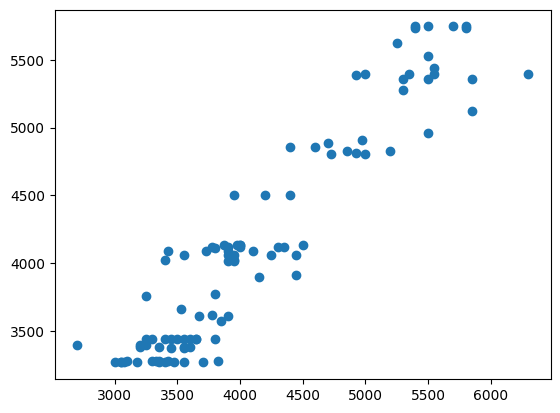

In [14]:
plt.scatter(y_test, base_preds)

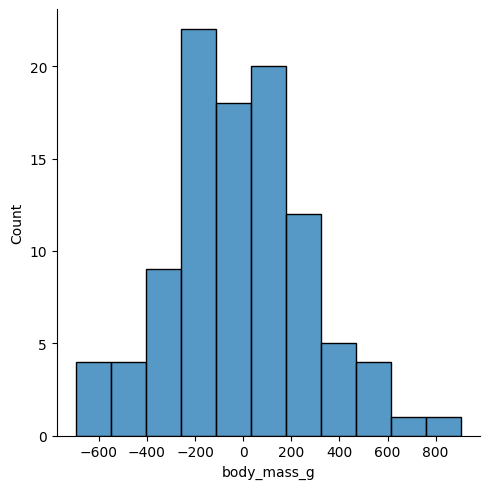

In [15]:
sns.displot(y_test- base_preds)

In [16]:
model.feature_importances_

array([0.00689396, 0.3017009 , 0.        , 0.00130856, 0.13006586,
       0.05540511, 0.06006604, 0.44455956])

In [17]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
flipper_length_mm,0.444560
species_Gentoo,0.301701
sex_Male,0.130066
bill_depth_mm,0.060066
bill_length_mm,0.055405
species_Chinstrap,0.006894
island_Torgersen,0.001309
island_Dream,0.000000


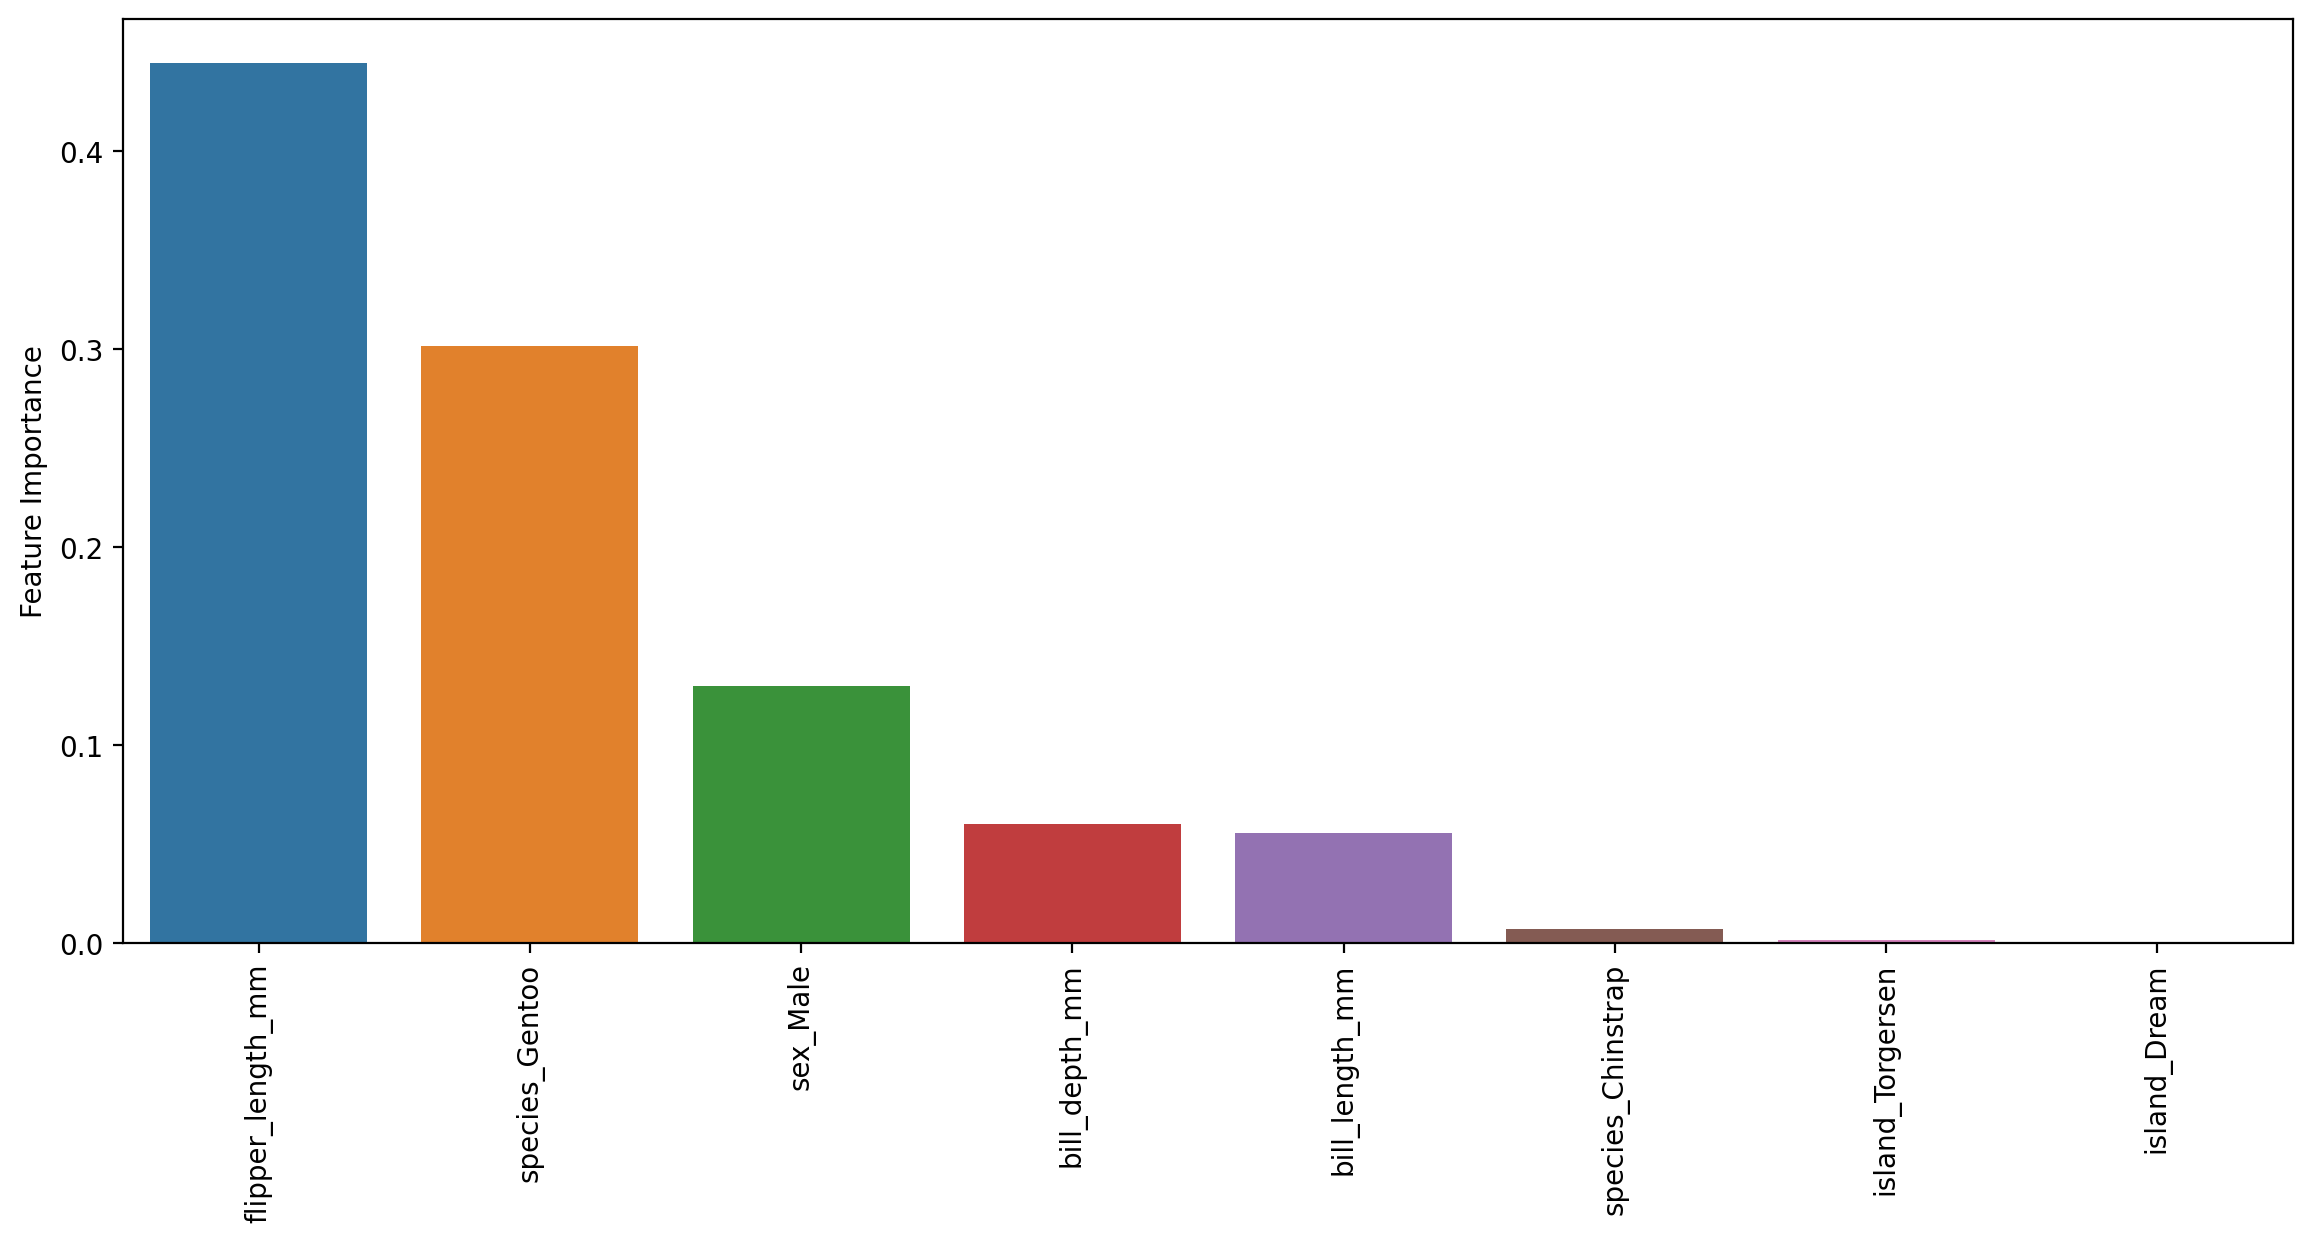

In [18]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Grid Search

In [19]:
model = AdaBoostRegressor()

In [20]:
n_estimators = [15,20,25,30,35]
learning_rate = [1]
loss = ['linear', 'square', 'exponential']

parametros = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,
              'loss': loss}

In [21]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [22]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [15, 20, 25, 30, 35]},
             scoring='neg_mean_squared_error')

In [23]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 20}

In [24]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [25]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 240.3740540372944
Mean Squared Error: 92889.88677893464
Root Mean Squared Error: 304.7784224300248


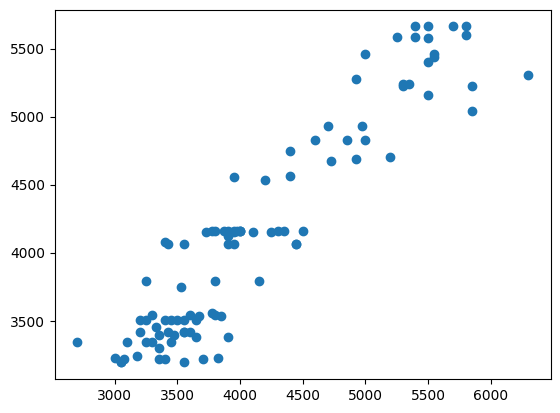

In [26]:
plt.scatter(y_test, y_pred)

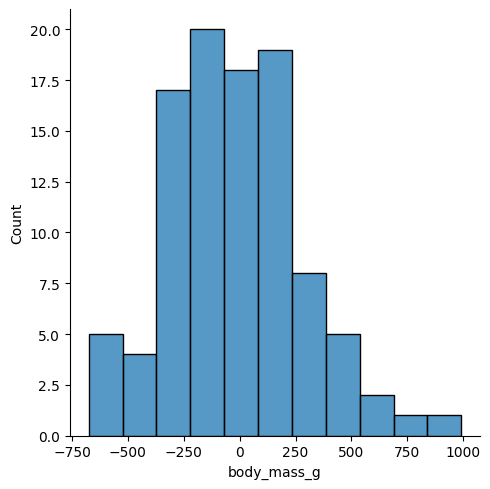

In [27]:
sns.displot(y_test- y_pred)

In [28]:
grid_model.best_estimator_.feature_importances_

array([7.91606246e-03, 3.57672841e-01, 3.79796315e-04, 1.66143771e-03,
       1.57468286e-01, 4.61927559e-02, 4.80383656e-02, 3.80670454e-01])

In [29]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
flipper_length_mm,0.380670
species_Gentoo,0.357673
sex_Male,0.157468
bill_depth_mm,0.048038
bill_length_mm,0.046193
species_Chinstrap,0.007916
island_Torgersen,0.001661
island_Dream,0.000380


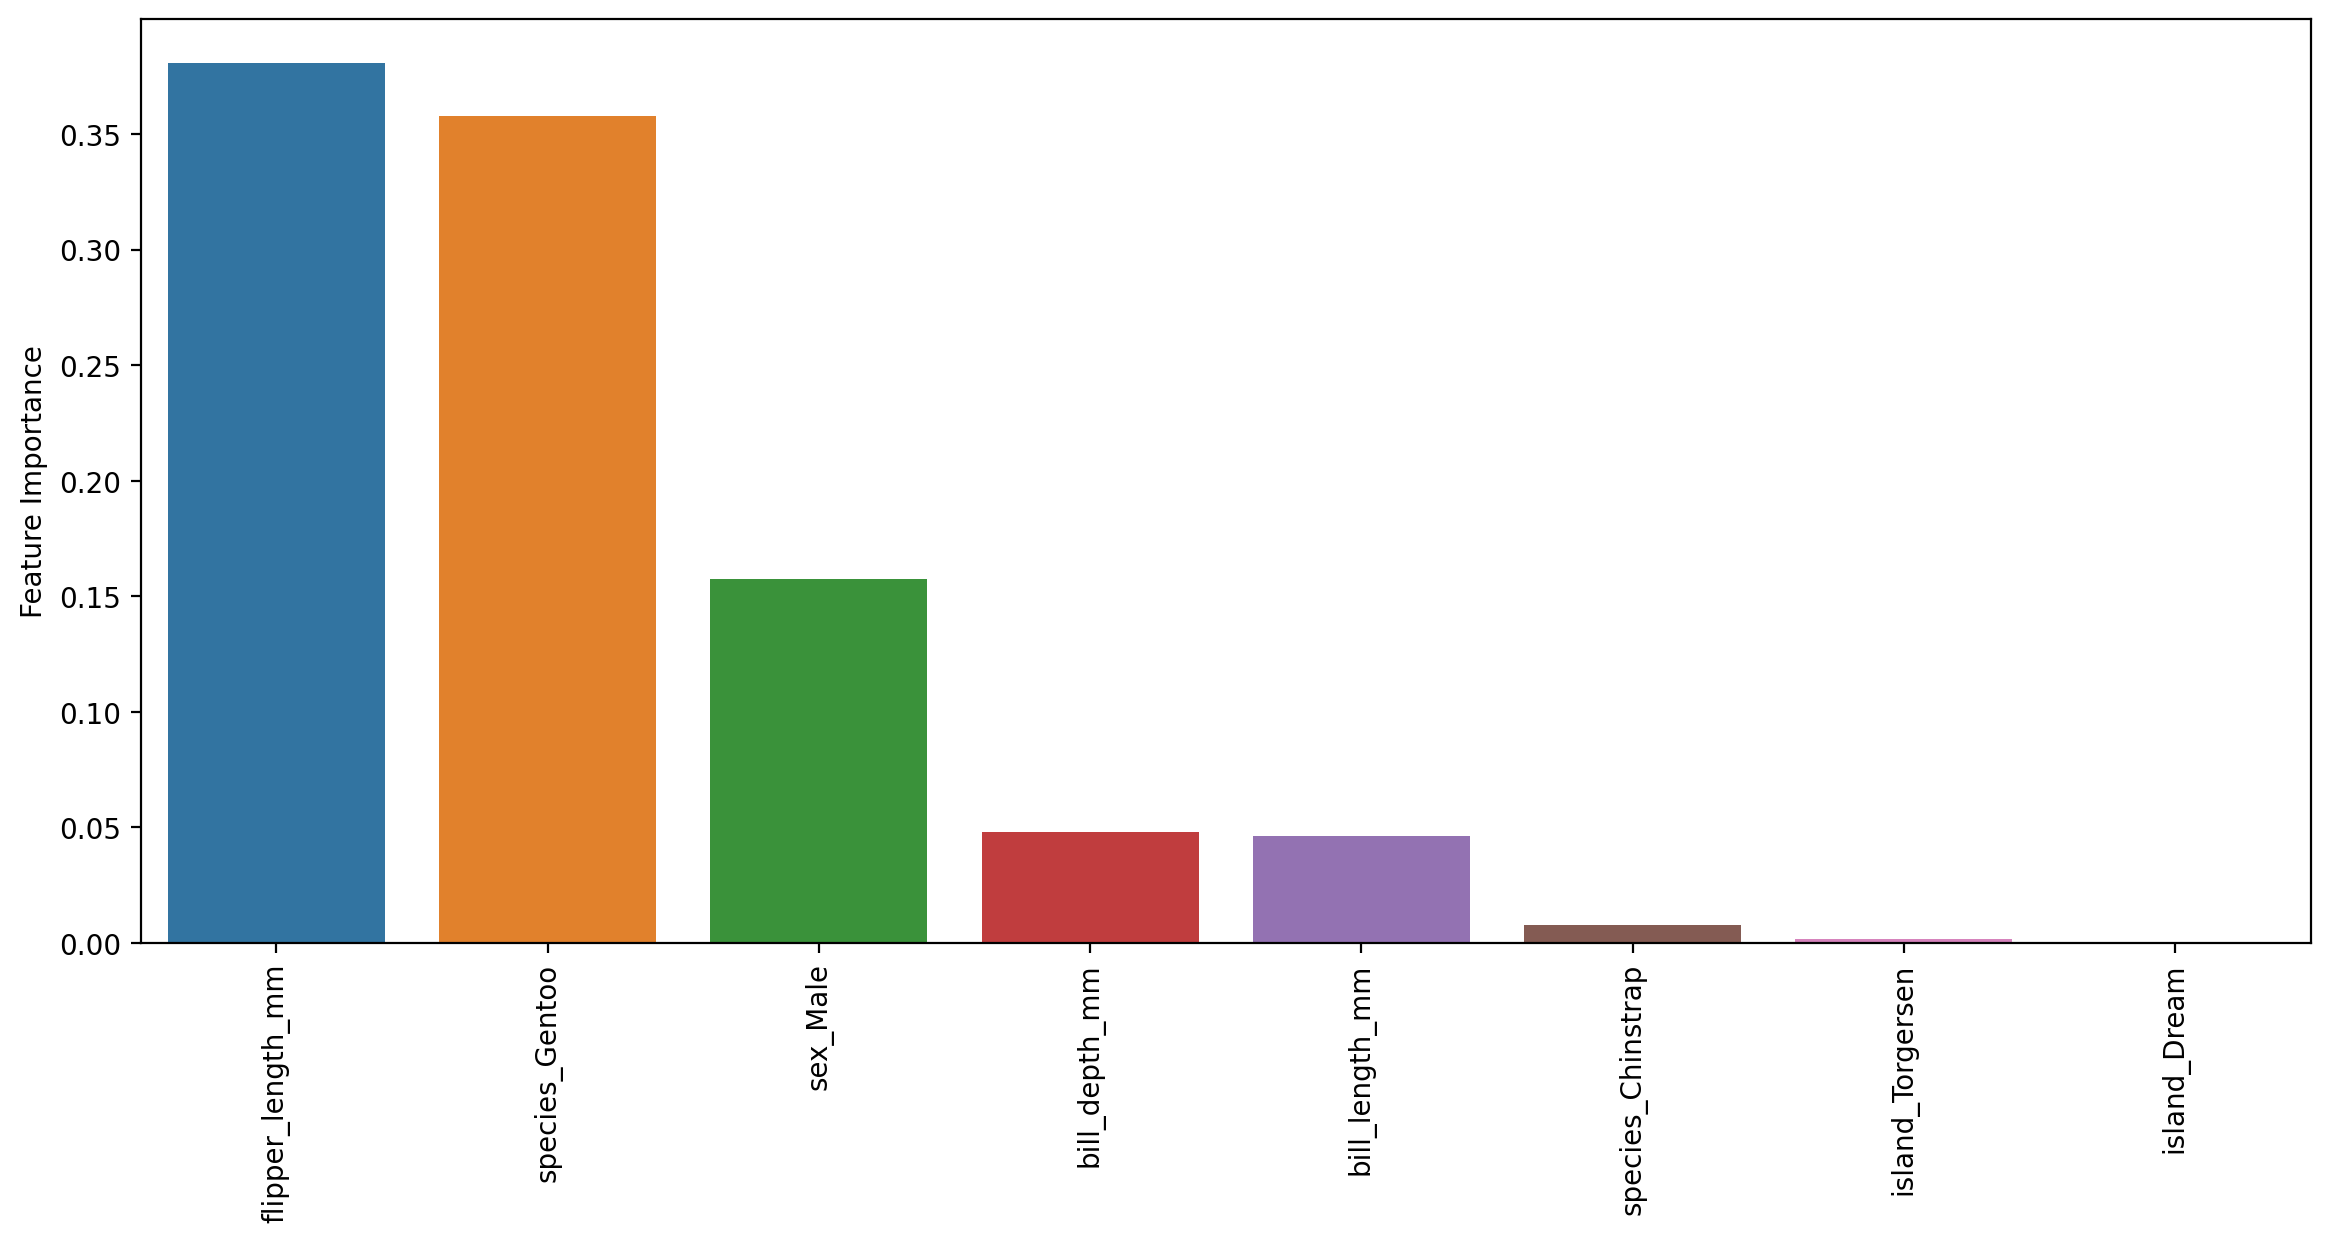

In [30]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Elbow

In [31]:
errors = []

for n in range(1,128):
    rfc = AdaBoostRegressor( n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = metrics.mean_squared_error(preds,y_test)
    errors.append(err)

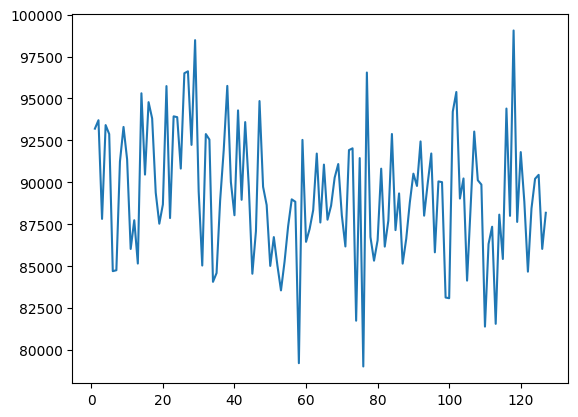

In [32]:
plt.plot(range(1,128),errors)